# Google Analytics Customer Revenue Prediction - EDA + Baseline Model

## Problem Statement

The 80/20 rule has proven true for many businesses–only a small percentage of customers produce most of the revenue. As such, marketing teams are challenged to make appropriate investments in promotional strategies.
In this kaggle competition,we are challenged to analyze a Google Merchandise Store (also known as GStore, where Google swag is sold) customer dataset to predict revenue per customer. 
Hopefully, the outcome will be more actionable operational changes and a better use of marketing budgets for those companies who choose to use data analysis on top of GA data.

### GStore

RStudio, the developer of free and open tools for R and enterprise-ready products for teams to scale and share work, has partnered with Google Cloud and Kaggle to demonstrate the business impact that thorough data analysis can have.

In this kaggle competition,we are challenged to analyze a Google Merchandise Store (also known as GStore, where Google swag is sold) customer dataset to predict revenue per customer. 
Hopefully, the outcome will be more actionable operational changes and a better use of marketing budgets for those companies who choose to use data analysis on top of GA data.

### File Descriptions
- train.csv - the training set - contains the same data as the BigQuery rstudio_train_set.
- test.csv - the test set - contains the same data as the BigQuery rstudio_test_set.
- sampleSubmission.csv - a sample submission file in the correct format. Contains all fullVisitorIds in test.csv.

### Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, we should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).



In [6]:
#Import Section
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import matplotlib & seaborn for visualisation
import json
from pandas.io.json import json_normalize
import seaborn as sns 
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import numpy as np
init_notebook_mode(connected=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import missingno as msno

C:\Users\Pavan Sanagapati\AppData\Local\Programs\Python\Python36\lib\site-packages\plotly\tools.py:103: UserWarning:

Looks like you don't have 'read-write' permission to your 'home' ('~') directory or to our '~/.plotly' directory. That means plotly's python api can't setup local configuration files. No problem though! You'll just have to sign-in using 'plotly.plotly.sign_in()'. For help with that: 'help(plotly.plotly.sign_in)'.
Questions? Visit https://support.plot.ly



### Data Mining

The data is shared in big query and csv format. The csv files contains some filed with json objects. 

Let us first explore what features of the datasets are json fields and then use a function done by Julian in his kernel to convert them and explore the revised dataset.


In [8]:
df_train = pd.read_csv("train.csv",sep=',')

df_test = pd.read_csv("test.csv",sep=',')

C:\Users\Pavan Sanagapati\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



Let us first explore how many features in the datasets are JSON fields in both train and test datasets.

**Train set:**

In [9]:
df_train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [10]:
df_test.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6167871330617112363,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024
1,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0643697640977915618,"{""continent"": ""Europe"", ""subContinent"": ""South...",0643697640977915618_1508175522,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508175522,1,1508175522
2,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6059383810968229466,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",6059383810968229466_1508143220,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508143220,1,1508143220
3,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2376720078563423631,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2376720078563423631_1508193530,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""8"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508193530,1,1508193530
4,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2314544520795440038,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2314544520795440038_1508217442,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""9"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508217442,1,1508217442


It is observed that there are four JSON features in the train & test datasets namely 'device', 'geoNetwork', 'totals', 'trafficSource.
These features need to be flattened out .For this  I will be using a function written by  julian in his kernel https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields/notebook.

Also, lets view the top rows of the dataset.

In [13]:
json_columns = ['device', 'geoNetwork','totals', 'trafficSource']
def load_dataframe(filename):
    #path = "../input/" + filename
    df = pd.read_csv(filename, converters={column: json.loads for column in json_columns}, 
                     dtype={'fullVisitorId': 'str'})
    
    for column in json_columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df

### Exploratory Data Analysis

Now let us run the above function for both train and test datasets and view the first few rows to understand the dataset in detail and perform detailed exploratory data analysis.

In [14]:
train = load_dataframe("train.csv")
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,...,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [15]:
test = load_dataframe("test.csv")
test.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,...,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


### Exploratory Data Analysis

Now that we mined the train and test data sets its time to do some exploratory data analysis. 

In [16]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
channelGrouping                                      903653 non-null object
date                                                 903653 non-null int64
fullVisitorId                                        903653 non-null object
sessionId                                            903653 non-null object
socialEngagementType                                 903653 non-null object
visitId                                              903653 non-null int64
visitNumber                                          903653 non-null int64
visitStartTime                                       903653 non-null int64
device_browser                                       903653 non-null object
device_browserSize                                   903653 non-null object
device_browserVersion                                903653 non-null object
device_deviceCategory                                9036

In [17]:
print(train.shape,test.shape)

(903653, 55) (804684, 53)


Let us look at what all are the **numerical variables** for both train and test sets
- Train Set:

In [18]:
numeric_features_train = train.select_dtypes(include=[np.number])
numeric_features_train.columns

Index(['date', 'visitId', 'visitNumber', 'visitStartTime'], dtype='object')

- Test Set:

In [19]:
numeric_features_test = test.select_dtypes(include=[np.number])
numeric_features_test.columns

Index(['date', 'visitId', 'visitNumber', 'visitStartTime'], dtype='object')

Let us look at what all are the **categorical variables** for both train and test sets
- Train Set 

In [20]:
categorical_features_train = train.select_dtypes(include=[np.object])
categorical_features_train.columns

Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'socialEngagementType',
       'device_browser', 'device_browserSize', 'device_browserVersion',
       'device_deviceCategory', 'device_flashVersion', 'device_language',
       'device_mobileDeviceBranding', 'device_mobileDeviceInfo',
       'device_mobileDeviceMarketingName', 'device_mobileDeviceModel',
       'device_mobileInputSelector', 'device_operatingSystem',
       'device_operatingSystemVersion', 'device_screenColors',
       'device_screenResolution', 'geoNetwork_city', 'geoNetwork_cityId',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_metro', 'geoNetwork_networkDomain',
       'geoNetwork_networkLocation', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue',
       'totals_visits', 'trafficSource_adContent',
       'trafficSource_adwordsCl

- Test Set:


In [21]:
categorical_features_test = test.select_dtypes(include=[np.object])
categorical_features_test.columns

Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'socialEngagementType',
       'device_browser', 'device_browserSize', 'device_browserVersion',
       'device_deviceCategory', 'device_flashVersion', 'device_language',
       'device_mobileDeviceBranding', 'device_mobileDeviceInfo',
       'device_mobileDeviceMarketingName', 'device_mobileDeviceModel',
       'device_mobileInputSelector', 'device_operatingSystem',
       'device_operatingSystemVersion', 'device_screenColors',
       'device_screenResolution', 'geoNetwork_city', 'geoNetwork_cityId',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_metro', 'geoNetwork_networkDomain',
       'geoNetwork_networkLocation', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_visits',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
     

Let us now explore the **missing values** in both train and test sets.


It is observed that there are some columns that contains "not available in demo dataset" as constant values predominently.So it is not going to be effective if we use these columns in our model prediction.So we can safely delete these features from both train and test datasets as below.

In [22]:
print ("Before removing constant columns - shape of train & test datasets: ", train.shape,test.shape)

train = train.loc[:, (train != train.iloc[0]).any()]

test = test.loc[:, (test != test.iloc[0]).any()]

print ("After Removing Constant Columns - shape of train & test datasets: ", train.shape,test.shape)

Before removing constant columns - shape of train & test datasets:  (903653, 55) (804684, 53)
After Removing Constant Columns - shape of train & test datasets:  (903653, 36) (804684, 34)


#### Missing values for all categorical features in Bar chart Representation

- **Train set**

In [23]:
total_test = categorical_features_train.isnull().sum().sort_values(ascending=False)
percent = (categorical_features_train.isnull().sum()/categorical_features_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total_test, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(14)

,Total Missing Count,% of Total Observations
Feature,,
trafficSource_campaignCode,903652,99.999889
trafficSource_adContent,892707,98.788694
totals_transactionRevenue,892138,98.725728
trafficSource_adwordsClickInfo.slot,882193,97.625195
trafficSource_adwordsClickInfo.page,882193,97.625195
trafficSource_adwordsClickInfo.isVideoAd,882193,97.625195
trafficSource_adwordsClickInfo.adNetworkType,882193,97.625195
trafficSource_adwordsClickInfo.gclId,882092,97.614018
trafficSource_isTrueDirect,629648,69.678073


**Let us visualise the missing categorical features for train set:**

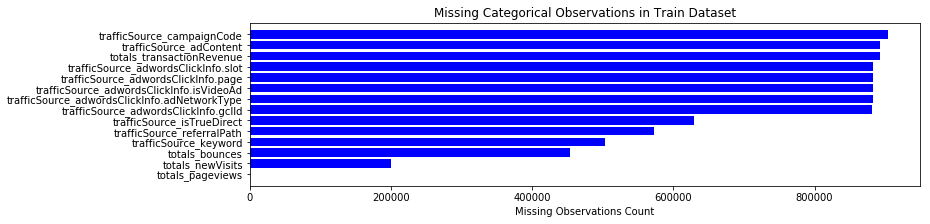

In [24]:
missing_values = categorical_features_train.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')
ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Categorical Observations in Train Dataset")
plt.show()

In [25]:
total_test = categorical_features_test.isnull().sum().sort_values(ascending=False)
percent = (categorical_features_test.isnull().sum()/categorical_features_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total_test, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(12)

,Total Missing Count,% of Total Observations
Feature,,
trafficSource_adContent,750893,93.315264
trafficSource_adwordsClickInfo.slot,750870,93.312406
trafficSource_adwordsClickInfo.page,750870,93.312406
trafficSource_adwordsClickInfo.isVideoAd,750870,93.312406
trafficSource_adwordsClickInfo.adNetworkType,750870,93.312406
trafficSource_adwordsClickInfo.gclId,750822,93.306441
trafficSource_referralPath,569361,70.755850
trafficSource_isTrueDirect,544171,67.625428
trafficSource_keyword,391032,48.594479


**Let us visualise the missing categorical features test:**

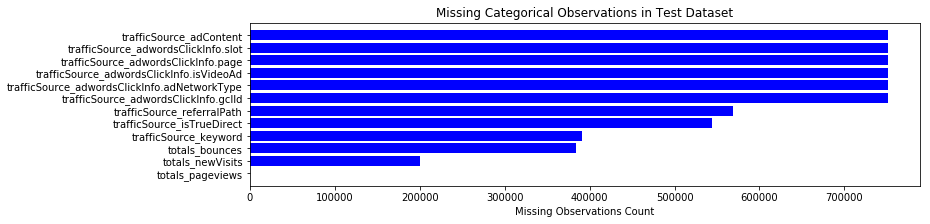

In [26]:
missing_values = categorical_features_test.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')
ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Categorical Observations in Test Dataset")
plt.show()

### Univariate Analysis:

Lets perform  univariate analysis on some of the variables in the dataset and plot their distributions to unfold patterns or insights about the data

**Geo Network Attributes:**

Let us see what all geonetwork attributes are 

- geoNetwork_city
- geoNetwork_continent
- geoNetwork_country
- geoNetwork_metro
- geoNetwork_networkDomain
- geoNetwork_region
- geoNetwork_subContinent

So among the above geoNetwork attributes let us consider 'geoNetwork_country' attribute and visualise customer revenue

In [27]:
colorscale = [[0, 'rgb(102,194,165)'], [0.0005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = train["geoNetwork_country"].value_counts().index,
        locationmode = 'country names',
        z = train["geoNetwork_country"].value_counts().values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 1)),
            colorbar = dict( title = 'Customer Visits ')
            ) 
       ]

layout = dict(
    height=600,
    title = 'World Wide Customer Visit Distribution',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 50,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)

Here are some  comprehensive listing of the ** world projections ** which we can visualise .
- equirectangular
- mercator
- orthographic
- natural earth
- kavrayskiy7
- miller
- robinson
- eckert4
- azimuthal equal area
- azimuthal equidistant
- conic equal area
- conic conformal
- conic equidistant
- gnomonic
- stereographic
- mollweide
- hammer
- transverse mercator

To see the different visualisation effects using the above parameter replace the value of type = 'conic equal area' in the layout geo section .

In [28]:
colorscale = [[0, 'rgb(102,194,165)'], [0.0005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = train["geoNetwork_country"].value_counts().index,
        locationmode = 'country names',
        z = train["geoNetwork_country"].value_counts().values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 1)),
            colorbar = dict( title = 'Customer Visits ')
            ) 
       ]

layout = dict(
    height=600,
    title = 'World Wide Customer Visit Distribution',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'conic equal area',
            rotation = dict(
                    lon = 50,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)

Let us now visualise by city, country ,sub continent and continent

In [29]:
geo_cols = ["geoNetwork_city", "geoNetwork_country", "geoNetwork_subContinent", "geoNetwork_continent"]
colors = ["#d6a5ff", "#fca6da", "#f4d39c", "#a9fcca"]
traces = []
for i, col in enumerate(geo_cols):
    t = train[col].value_counts()
    traces.append(go.Bar(marker=dict(color=colors[i]),orientation="h", y = t.index[:15], x = t.values[:15]))

fig = tools.make_subplots(rows=2, cols=2, 
                          subplot_titles=["Visits: City", "Visits: Country","Visits: Sub Continent","Visits: Continent"]
                          , print_grid=False)
fig.append_trace(traces[0], 1, 1)
fig.append_trace(traces[1], 1, 2)
fig.append_trace(traces[2], 2, 1)
fig.append_trace(traces[3], 2, 2)

fig['layout'].update(height=600,width=1000, showlegend=False)
iplot(fig)

train["totals_transactionRevenue"] = train["totals_transactionRevenue"].astype('float')

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=["Mean Revenue by City", "Mean Revenue by Country","Mean Revenue by Sub Continent","Mean Revenue by Continent"], print_grid=False)

colors = ["red", "green", "purple","blue"]
trs = []
for i, col in enumerate(geo_cols):
    tmp = train.groupby(col).agg({"totals_transactionRevenue": "mean"}).reset_index().rename(columns={"totals_transactionRevenue" : "Mean Revenue"})
    tmp = tmp.dropna()
    tr = go.Bar(x = tmp["Mean Revenue"], orientation="h", marker=dict(opacity=0.5, color=colors[i]), y = tmp[col])
    trs.append(tr)

fig.append_trace(trs[0], 1, 1)
fig.append_trace(trs[1], 1, 2)
fig.append_trace(trs[2], 2, 1)
fig.append_trace(trs[3], 2, 2)

fig['layout'].update(height=600,width=1000, showlegend=False)
iplot(fig)

**Channel Grouping**

In [30]:
t = train['channelGrouping'].value_counts()
values1 = t.values 
index1 = t.index
domain1 = {'x': [0.2, 0.50], 'y': [0.0, 0.33]}
fig = {
  "data": [
    {
      "values": values1,
      "labels": index1,
      "domain": {"x": [0, .48]},
    "marker" : dict(colors=["#f77b9c" ,'#ab97db',  '#b0b1b2']),
      "name": "Channel Grouping",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    }
   ],
  "layout": {"title":"Channel Grouping",
      "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Channel Grouping",
                "x": 0.11,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

**Traffic Attributes**

In [31]:
fig = tools.make_subplots(rows=1, cols=2,subplot_titles=["Traffic Source Campaign (not-set removed)", "Traffic Source Medium"], print_grid=False)
 
colors = ["#d6a5ff", "#fca6da", "#f4d39c", "#a9fcca"]
t1 = train["trafficSource_campaign"].value_counts()
t2 = train["trafficSource_medium"].value_counts()

tr1 = go.Bar(x = t1.index, y = t1.values, marker=dict(color=colors[1]))
tr2 = go.Bar(x = t2.index, y = t2.values, marker=dict(color=colors[2]))

fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)


fig['layout'].update(height=400, margin=dict(b=100), showlegend=False)
iplot(fig)

 **Visits by Date, Month and Day**
 
 Let us first create a function to create new features by month,day & weekday

In [32]:
def add_date_features(df):
    df['date'] = df['date'].astype(str)
    df["date"] = df["date"].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
    df["date"] = pd.to_datetime(df["date"])
    
    df["month"]   = df['date'].dt.month
    df["day"]     = df['date'].dt.day
    df["weekday"] = df['date'].dt.weekday
    return df 

Now let us pass the train dataset to the above function to extract day,month and weekday column

In [33]:
train = add_date_features(train)

Now let us visualise Visits by date & Monthly revenue by date using plotly 

In [34]:
# Visualization for Visits by date
tmp = train['date'].value_counts().to_frame().reset_index().sort_values('index')
tmp = tmp.rename(columns = {"index" : "dateX", "date" : "visits"})

tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["visits"])
layout = go.Layout(title="Visits by Date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)
# Visualization for Visits by monthly revenue
tmp = train.groupby("date").agg({"totals_transactionRevenue" : "mean"}).reset_index()
tmp = tmp.rename(columns = {"date" : "dateX", "totals_transactionRevenue" : "mean_revenue"})
tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["mean_revenue"])
layout = go.Layout(title="Monthly Revenue by Date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)

**Visits by Month, Month Day & Week Day**

In [35]:
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["Visits by Month", "Visits by Month Day", "Visits by Week Day"], print_grid=False)
trs = []
for i,col in enumerate(["month", "day", "weekday"]):
    t = train[col].value_counts()
    tr = go.Bar(x = t.index, marker=dict(color=colors[i]), y = t.values)
    trs.append(tr)

fig.append_trace(trs[0], 1, 1)
fig.append_trace(trs[1], 1, 2)
fig.append_trace(trs[2], 1, 3)
fig['layout'].update(height=400, showlegend=False)
iplot(fig)

**Mean Revenue by Month, Month Day & Week Day**

In [36]:
tmp1 = train.groupby('month').agg({"totals_transactionRevenue" : "mean"}).reset_index()
tmp2 = train.groupby('day').agg({"totals_transactionRevenue" : "mean"}).reset_index()
tmp3 = train.groupby('weekday').agg({"totals_transactionRevenue" : "mean"}).reset_index()

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["MeanRevenue by Month", "MeanRevenue by MonthDay", "MeanRevenue by WeekDay"], print_grid=False)
tr1 = go.Bar(x = tmp1.month, marker=dict(color="yellow", opacity=0.5), y = tmp1.totals_transactionRevenue)
tr2 = go.Bar(x = tmp2.day, marker=dict(color="blue", opacity=0.5), y = tmp2.totals_transactionRevenue)
tr3 = go.Bar(x = tmp3.weekday, marker=dict(color="violet", opacity=0.5), y = tmp3.totals_transactionRevenue)

fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)
fig.append_trace(tr3, 1, 3)
fig['layout'].update(height=400, showlegend=False)
iplot(fig)

### Visitor Profile

Lets create the visitor profile by aggregating the rows for every customer.


In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

agg_dict = {}
for col in ["totals_bounces", "totals_hits", "totals_newVisits", "totals_pageviews", "totals_transactionRevenue"]:
    train[col] = train[col].astype('float')
    agg_dict[col] = "sum"
tmp = train.groupby("fullVisitorId").agg(agg_dict).reset_index()
tmp.head()

,fullVisitorId,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_transactionRevenue
0,0000010278554503158,0.0,11.0,1.0,8.0,0.0
1,0000020424342248747,0.0,17.0,1.0,13.0,0.0
2,0000027376579751715,0.0,6.0,1.0,5.0,0.0
3,0000039460501403861,0.0,2.0,1.0,2.0,0.0
4,0000040862739425590,0.0,5.0,1.0,5.0,0.0


**Total Revenue Distribution**

Let us look at the distribution of total revenue without normalisation 

There are 9996 visitors in the train dataset having non zero total transaction revenue


C:\Users\Pavan Sanagapati\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



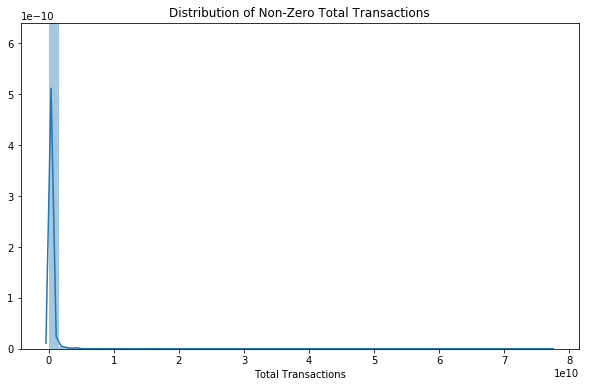

In [38]:
non_zero = tmp[tmp["totals_transactionRevenue"] > 0]["totals_transactionRevenue"]
print ("There are " + str(len(non_zero)) + " visitors in the train dataset having non zero total transaction revenue")

plt.figure(figsize=(10,6))
sns.distplot(non_zero)
plt.title("Distribution of Non-Zero Total Transactions");
plt.xlabel("Total Transactions");

Now let us apply natural log transformation on the transactions and visualise it.

C:\Users\Pavan Sanagapati\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



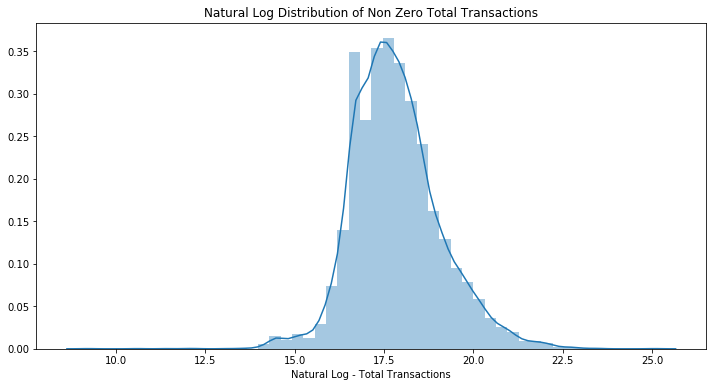

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(np.log1p(non_zero))
plt.title("Natural Log Distribution of Non Zero Total Transactions");
plt.xlabel("Natural Log - Total Transactions");

## Baseline Model

### PreProcessing

During preprocessing step, let us identify which columns need to be removed considering the following factors.

- Columns with constant values
- Id columns and other non relevant columns

In [40]:
## find constant columns
constant_columns = []
for col in train.columns:
    if len(train[col].value_counts()) == 1:
        constant_columns.append(col)

## non relevant columns
non_relevant = ["visitNumber", "date", "fullVisitorId", "sessionId", "visitId", "visitStartTime"]

Lets now load test dataset and apply the date function defined above so that it can be used to make predictions

In [41]:
test = add_date_features(test)

**Categorical Feature Handling**

In [48]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [c for c in train.columns if not c.startswith("total")]
categorical_columns = [c for c in categorical_columns if c not in constant_columns + non_relevant]
for c in categorical_columns:

    le = LabelEncoder()
    train_vals = list(train[c].values.astype(str))
    test_vals = list(test[c].values.astype(str))
    
    le.fit(train_vals + test_vals)
    
    train[c] = le.transform(train_vals)
    test[c] = le.transform(test_vals)

**Numerical Feature Handling**

To handle numerical features first let us create a function called "normalize_numerical_columns" that normalises the values 

In [49]:
def normalize_numerical_columns(df, isTrain = True):
    df["totals_hits"] = df["totals_hits"].astype(float)
    df["totals_hits"] = (df["totals_hits"] - min(df["totals_hits"])) / (max(df["totals_hits"]) - min(df["totals_hits"]))

    df["totals_pageviews"] = df["totals_pageviews"].astype(float)
    df["totals_pageviews"] = (df["totals_pageviews"] - min(df["totals_pageviews"])) / (max(df["totals_pageviews"]) - min(df["totals_pageviews"]))
    
    if isTrain:
        df["totals_transactionRevenue"] = df["totals_transactionRevenue"].fillna(0.0)
    return df 

Now let apply the above function on both train and test datasets.

In [50]:
train = normalize_numerical_columns(train)
test = normalize_numerical_columns(test, isTrain = False)

**Create a train and validation sets **

In [51]:
from sklearn.model_selection import train_test_split
features = [c for c in train.columns if c not in constant_columns + non_relevant]
features.remove("totals_transactionRevenue")
train["totals_transactionRevenue"] = np.log1p(train["totals_transactionRevenue"].astype(float))
train_x, valid_x, train_y, valid_y = train_test_split(train[features], train["totals_transactionRevenue"], test_size=0.25, random_state=20)

**Create LGBM model and train it**

In [52]:
import lightgbm as lgb 

lgb_params = {"objective" : "regression", "metric" : "rmse",
              "num_leaves" : 50, "learning_rate" : 0.02, 
              "bagging_fraction" : 0.75, "feature_fraction" : 0.8, "bagging_frequency" : 9}
    
lgb_train = lgb.Dataset(train_x, label=train_y)
lgb_val = lgb.Dataset(valid_x, label=valid_y)
model = lgb.train(lgb_params, lgb_train, 700, valid_sets=[lgb_val], early_stopping_rounds=150, verbose_eval=20)

Training until validation scores don't improve for 150 rounds.
[20]	valid_0's rmse: 0.303449
[40]	valid_0's rmse: 0.289706
[60]	valid_0's rmse: 0.282355
[80]	valid_0's rmse: 0.277956
[100]	valid_0's rmse: 0.275448
[120]	valid_0's rmse: 0.273864
[140]	valid_0's rmse: 0.272855
[160]	valid_0's rmse: 0.27192
[180]	valid_0's rmse: 0.271369
[200]	valid_0's rmse: 0.270969
[220]	valid_0's rmse: 0.270606
[240]	valid_0's rmse: 0.270312
[260]	valid_0's rmse: 0.270125
[280]	valid_0's rmse: 0.269981
[300]	valid_0's rmse: 0.269865
[320]	valid_0's rmse: 0.269788
[340]	valid_0's rmse: 0.269692
[360]	valid_0's rmse: 0.269645
[380]	valid_0's rmse: 0.269585
[400]	valid_0's rmse: 0.26956
[420]	valid_0's rmse: 0.269526
[440]	valid_0's rmse: 0.26951
[460]	valid_0's rmse: 0.269506
[480]	valid_0's rmse: 0.269483
[500]	valid_0's rmse: 0.269456
[520]	valid_0's rmse: 0.269411
[540]	valid_0's rmse: 0.269425
[560]	valid_0's rmse: 0.269429
[580]	valid_0's rmse: 0.269429
[600]	valid_0's rmse: 0.269428
[620]	valid_0'

**Generate Predictions & Submission**

In [53]:
preds = model.predict(test[features], num_iteration=model.best_iteration)
test["PredictedLogRevenue"] = np.expm1(preds)
submission = test.groupby("fullVisitorId").agg({"PredictedLogRevenue" : "sum"}).reset_index()
submission["PredictedLogRevenue"] = np.log1p(submission["PredictedLogRevenue"])
submission["PredictedLogRevenue"] =  submission["PredictedLogRevenue"].apply(lambda x : 0.0 if x < 0 else x)
submission.to_csv("baseline.csv", index=False)
submission.head()

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.000000
1,0000049363351866189,0.000000
2,0000053049821714864,0.000000
3,0000059488412965267,0.000120
4,0000085840370633780,0.004753
